# Walmart Business Case Study - Confidence Interval and CLT

**Business Problem**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

**Dataset**

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

- User_ID    :	User ID
- Product_ID :	Product ID
- Gender     :	Sex of User
- Age        :	Age in bins
- Occupation :	Occupation(Masked)
- City_Category         :	Category of the City (A,B,C)
- StayInCurrentCityYears:	Number of years stay in current city
- Marital_Status        :	Marital Status
- ProductCategory       :	Product Category (Masked)
- Purchase              :	Purchase Amount

**Importing required packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import NaN, nan, NAN
import warnings
warnings.filterwarnings("ignore")

**Loading data into Dataframe**

In [2]:
walmart_df = pd.read_csv('data/walmart_data.csv')
walmart_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [3]:
walmart_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [4]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [14]:
# To convert datatype of cols = ['Gender', 'Age','Product_ID'] to Category
# Changing datatype of Gender, Age and Product_ID from Object to Category.
cols = ['Gender', 'Age','Product_ID','City_Category']
for i in cols:
    walmart_df[i] = walmart_df[i].astype("category")
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  object  
 7   Marital_Status              550068 non-null  int64   
 8   Product_Category            550068 non-null  int64   
 9   Purchase                    550068 non-null  int64   
dtypes: category(4), int64(5), object(1)
memory usage: 28.0+ MB


In [6]:
walmart_df.isnull().sum()/len(walmart_df) *100

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category              0.0
Purchase                      0.0
dtype: float64

In [15]:
walmart_df.duplicated().sum()

0

In [16]:
walmart_df['User_ID'].nunique()

5891

In [17]:
walmart_df.groupby(['Gender'])['User_ID'].nunique()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

In [18]:
round(walmart_df.groupby(['Gender'])['User_ID'].nunique()/walmart_df['User_ID'].nunique() * 100,2)

Gender
F    28.28
M    71.72
Name: User_ID, dtype: float64

# **Outliers detection and removal**

In [19]:
walmart_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


**OBS**:
As we can clearly see that, the max value in occupation, Product_Category, Purchase are greated than 75th percentile and way more than mean, so these are the outliers
    

In [20]:
walmart_df.groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


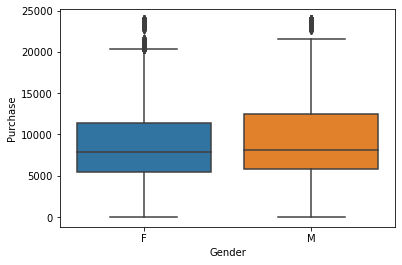

In [21]:
sns.boxplot(x = 'Gender', y = 'Purchase', data = walmart_df)
plt.show()

<AxesSubplot:xlabel='Occupation', ylabel='Density'>

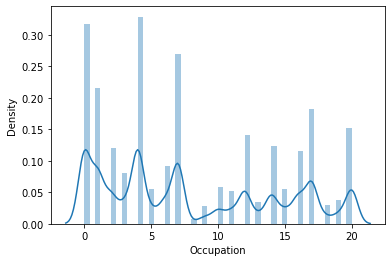

In [22]:
sns.distplot(walmart_df['Occupation'])

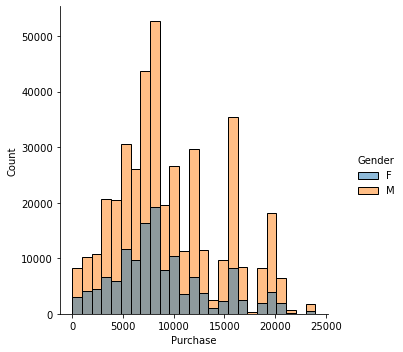

In [23]:
sns.displot(data = walmart_df, x = 'Purchase', hue = 'Gender',bins = 25)
plt.show()

In [ ]:
#OBS

In [49]:
walmart_df.groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [50]:
walmart_df.sample(300).groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,73.0,8749.452055,5564.481061,26.0,5326.0,7888.0,10637.0,23815.0
M,227.0,9056.907489,5068.969765,24.0,5396.0,7992.0,11952.5,23809.0


In [50]:
walmart_df_sample1 = walmart_df[walmart_df['Gender'] == 'M']
type(walmart_df_sample1)

pandas.core.frame.DataFrame

In [52]:
walmart_df_sample_purchase = walmart_df_sample1['Purchase']



<AxesSubplot:>

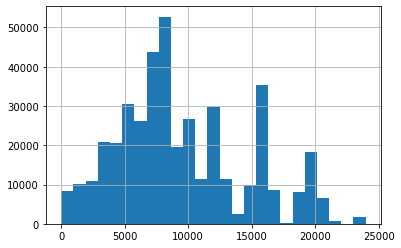

In [53]:
walmart_df_sample_purchase.hist(bins = 25)

As we can see, the above plot is not normal distribution and if we assume it to be normal and do all calculations based on it, it might lead us to wrong conclusion and hence applying CLT to get the sampling distribution of sample means to get a Normal Distribution out of it.

In [54]:
walmart_df_sample_purchase.mean()

9437.526040472265

In [55]:
walmart_df_sample_purchase.std()

5092.186209777949

In [56]:
walmart_df_sample1.shape

(414259, 10)

In [57]:
len(walmart_df_sample_purchase)

414259

So mean lies somewhere in the left side, not symmnetric, it's Right Skewed

**Bootstrapping**

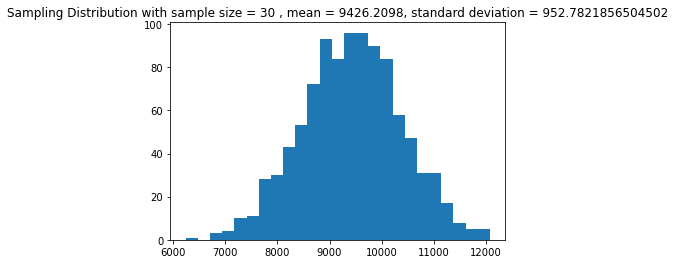

In [63]:

m = 1000
sample = walmart_df_sample_purchase 
size = 30 # len(walmart_df_sample_purchase)
bs_means = np.empty(m)

for i in range(m):
    bs_sample = np.random.choice(sample, size = size)
    bs_means[i] = np.mean(bs_sample)
plt.figure()
plt.hist(bs_means, bins = 25)
plt.title(f"Sampling Distribution with sample size = 30 , mean = {np.mean(bs_means)}, standard deviation = {np.std(bs_means)}")
plt.show()


In [64]:
# plt.hist(bs_means, bins = 25);

In [67]:
# for comparison
walmart_df.groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


**Effect of n i.e sample size**

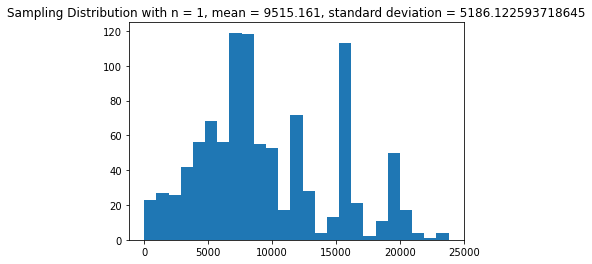

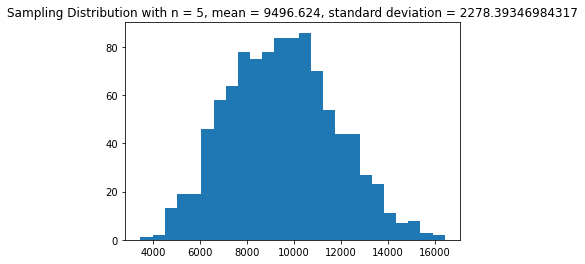

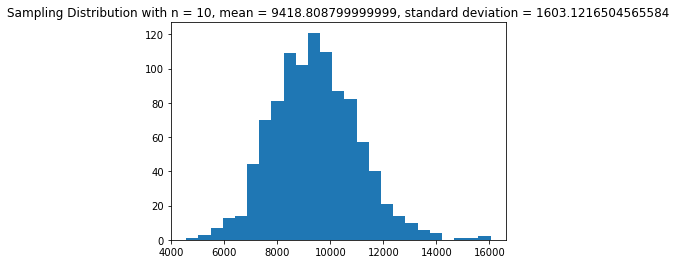

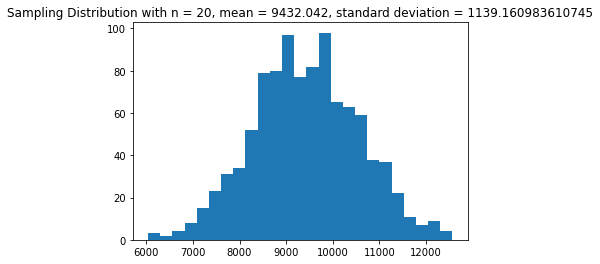

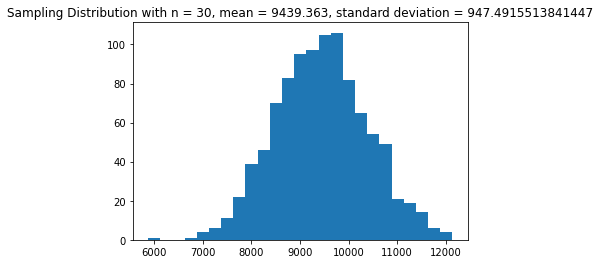

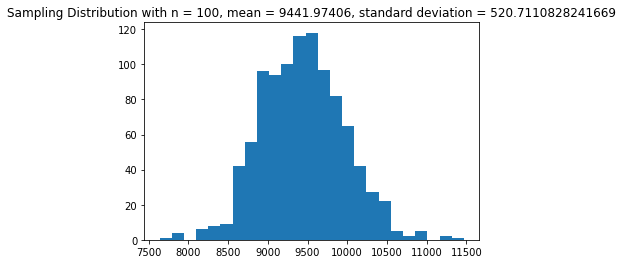

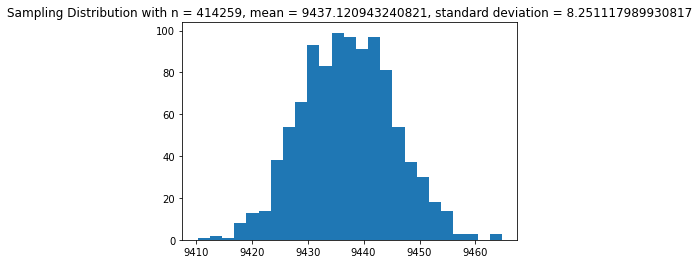

In [66]:
m = 1000
sample = walmart_df_sample_purchase
size_list = [1, 5, 10, 20, 30, 100, len(walmart_df_sample_purchase)]


for n in size_list:
    bs_means_n = np.empty(m)
    for i in range(m):
        bs_sample_n = np.random.choice(sample, size = n)
        bs_means_n[i] = np.mean(bs_sample_n)
    plt.figure()
    plt.hist(bs_means_n, bins = 25)
    plt.title(f"Sampling Distribution with n = {n}, mean = {np.mean(bs_means_n)}, standard deviation = {np.std(bs_means_n)}")
    plt.show()
        

As sample size increase, Standard error (standard deviation of "sampling distribution of sampling means") decreases. And we want the standard error to be minimizes which we have brougt to 8.25 from 5092(org data)

**Standard Error**

In [68]:
m = 1000
sample = walmart_df_sample_purchase
size_list = [1, 5, 10, 20, 30, 100, len(walmart_df_sample_purchase)]


for n in size_list:
    bs_means_n = np.empty(m)
    for i in range(m):
        bs_sample_n = np.random.choice(sample, size = n)
        bs_means_n[i] = np.mean(bs_sample_n)
    print(f"sample size = {n}, Emperical Standard Error = {np.std(bs_means_n)}, Theoretical Standard Error = {np.std(sample)/np.sqrt(n)}")
    

sample size = 1, Emperical Standard Error = 5187.288627022695, Theoretical Standard Error = 5092.180063635943
sample size = 5, Emperical Standard Error = 2300.5505839985, Theoretical Standard Error = 2277.292155191835
sample size = 10, Emperical Standard Error = 1649.8347447170306, Theoretical Standard Error = 1610.2887256790739
sample size = 20, Emperical Standard Error = 1140.576462460732, Theoretical Standard Error = 1138.6460775959174
sample size = 30, Emperical Standard Error = 929.9487791275963, Theoretical Standard Error = 929.7006292438327
sample size = 100, Emperical Standard Error = 505.4017615998559, Theoretical Standard Error = 509.2180063635943
sample size = 414259, Emperical Standard Error = 7.5561716105008685, Theoretical Standard Error = 7.911662926429179


This will answer to the question, 
- Is our sample size big enough ? 
    - The **sampling distribution should be normally distributed**, if not , increase the sample size.
    - Check **if the standard error is acceptable for our application**, if not increase the sample size.
    - Check **confidence intervals, if the range of interval estimates is high**, increase the sample size.

In [69]:
np.percentile(bs_means, 2.5)

7570.051666666666

In [70]:
np.percentile(bs_means, 97.5)

11275.128333333332